In [1]:
import pandas as pd
import pandas as pd
# import os
# os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
# os.environ["CUDA_VISIBLE_DEVICES"] = "1"
# import cudf 
# import cugraph
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
# import dask_cudf
import re

# from dask.distributed import Client, wait
# from dask_cuda import LocalCUDACluster
import pandas as pd
from tqdm import tqdm 
import ast
from datetime import datetime
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [2]:
un=pd.read_csv("/home/sid/Unfollow_Analysis/Data/UsersUnfollowed/week9")

In [3]:
un.head()

,Unnamed: 0,week_x,u,f,week_y,unfollow_y,Week_Range
0,6,8,554147941,281663466,9,1,3-6 August 2018
1,7,8,554147941,821157625,9,1,3-6 August 2018
2,554,8,45610476,1014104010561900544,9,1,3-6 August 2018
3,566,8,17147624,2352982249,9,1,3-6 August 2018
4,570,8,947945305,17641457,9,1,3-6 August 2018


In [4]:
df=pd.read_csv("/home/sid/Unfollow_Analysis/Data/FinalMergedDataset/week-9.csv")

In [5]:
df.head()

,Unnamed: 0,u,tweet,f,created at,unfollow,Unnamed: 0.1,in_reply_to_user_id,Sentiments
0,0,24083751,RT @eprosenthal: New version 0.3.0 of skorch i...,2467685286,Thu Jul 26 23:16:18 +0000 2018,0,6,NaN,0
1,1,24083751,RT @eprosenthal: New version 0.3.0 of skorch i...,2467685286,Thu Jul 26 19:14:12 +0000 2018,0,1113170,NaN,0
2,2,24083751,RT @eprosenthal: New version 0.3.0 of skorch i...,2467685286,Thu Jul 26 15:44:28 +0000 2018,0,4614841,NaN,0
3,3,24083751,RT @eprosenthal: New version 0.3.0 of skorch i...,2467685286,Thu Jul 26 17:18:29 +0000 2018,0,11513921,NaN,0
4,4,24083751,RT @eprosenthal: New version 0.3.0 of skorch i...,2467685286,Fri Jul 27 12:29:02 +0000 2018,0,14107194,NaN,0


In [6]:
# Filter rows from un where 'u' and 'f' are in df
filtered_un = un[(un['u'].isin(df['u'])) & (un['f'].isin(df['f']))]

# Filter rows from df where 'u' and 'f' are in un
filtered_df = df[(df['u'].isin(un['u'])) & (df['f'].isin(un['f']))]

# Concatenate the filtered dataframes
merged = pd.concat([filtered_un, filtered_df], ignore_index=True)



In [7]:
merged.head()

,Unnamed: 0,week_x,u,f,week_y,unfollow_y,Week_Range,tweet,created at,unfollow,Unnamed: 0.1,in_reply_to_user_id,Sentiments


In [8]:
twt=pd.read_csv("/media/EXTHDD/UnfollowData/tweet_df_w9.csv")

/home/sid/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3433: DtypeWarning: Columns (0,1,2,3,4,5,6,8,9,10,14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [9]:
len(twt['created at'].unique())

14884515

In [10]:
twt.head()

,Unnamed: 0,screen_name,user_id,verified,tweet,created at,favorited,retweet_count,lang,hashtag,mention,followers count,followees count,user mentions,account created at,statuses_count,listed_count,favourites_count
0,0,jiminy_crist,3312634454,False,Insanely large PR implementing all of this: ht...,Fri Aug 03 17:58:10 +0000 2018,False,0.0,en,[],[],370.0,141.0,NaN,Tue Aug 11 17:21:32 +0000 2015,388.0,14.0,417.0
1,1,jiminy_crist,3312634454,False,"Implements range operations, atomic transactio...",Fri Aug 03 17:57:15 +0000 2018,False,0.0,en,[],[],370.0,141.0,NaN,Tue Aug 11 17:21:32 +0000 2015,388.0,14.0,417.0
2,2,jiminy_crist,3312634454,False,Base design lovingly borrowed from etcd (the k...,Fri Aug 03 17:56:15 +0000 2018,False,0.0,en,[],[],370.0,141.0,NaN,Tue Aug 11 17:21:32 +0000 2015,388.0,14.0,417.0
3,3,jiminy_crist,3312634454,False,Merged and documented the new fancy key-value ...,Fri Aug 03 17:54:28 +0000 2018,False,2.0,en,[],[],370.0,141.0,NaN,Tue Aug 11 17:21:32 +0000 2015,388.0,14.0,417.0
4,4,jiminy_crist,3312634454,False,Things have gotten a bit out of hand\n\nhttps:...,Tue Jul 31 23:04:10 +0000 2018,False,0.0,en,[],[],370.0,141.0,NaN,Tue Aug 11 17:21:32 +0000 2015,388.0,14.0,417.0


In [11]:
twt=twt.rename(columns={"user_id": "f"})

In [12]:
twt.shape

(75284397, 18)

In [13]:
import re
regex_pattern = r'(\w{3} \w{3} \d{2} \d{2}:\d{2}:\d{2} \+\d{4} \d{4})'

twt['created at'] = twt['created at'].str.extract(regex_pattern)


In [14]:
import pandas as pd
from dateutil.parser import parse

# Filter out rows with missing values in the 'created at' column
twt.dropna(subset=['created at'], inplace=True)

# Filter out non-string elements in the 'created at' column
twt = twt[twt['created at'].apply(lambda x: isinstance(x, str))]

# Convert date column to datetime format using dateutil
twt['created at'] = twt['created at'].apply(lambda x: parse(x))

# Convert date column to desired format
twt['created at'] = twt['created at'].dt.strftime('%Y-%m-%d')


In [15]:
twt['created at'].head()

0    2018-08-03
1    2018-08-03
2    2018-08-03
3    2018-08-03
4    2018-07-31
Name: created at, dtype: object

In [16]:
twt=twt.rename(columns={"user_id": "f"})
merged_df1 = pd.merge(un, twt, on="f", how="inner")
filtered_df1 = merged_df1[merged_df1["created at"] < "2018-08-06"]
grouped_df1 = filtered_df1.groupby(["f"])["tweet"].apply(list).reset_index()


In [17]:
# twt=twt.rename(columns={"f": "u"})

In [18]:
grouped_df1.head()

,f,tweet
0,1001000815,"[Awesome, inspiring piece by @EricaKlarreich, ..."
1,1004369828,"[RT @MIT_CSAIL: #otd in 1936, Alan Turing's ""U..."
2,10047202,"[When vendors try to sell you ""professional an..."
3,100675528,[RT @johnmichoian_: Stop getting rid of your p...
4,100763301,[Hey guys! I need some followers in Game of Cr...


In [19]:
grouped_df1 = filtered_df1.groupby(["f"])["tweet"].apply(list).reset_index()


In [20]:
grouped_df1

,f,tweet
0,1001000815,"[Awesome, inspiring piece by @EricaKlarreich, ..."
1,1004369828,"[RT @MIT_CSAIL: #otd in 1936, Alan Turing's ""U..."
2,10047202,"[When vendors try to sell you ""professional an..."
3,100675528,[RT @johnmichoian_: Stop getting rid of your p...
4,100763301,[Hey guys! I need some followers in Game of Cr...
...,...,...
2007,990844484,[#FOSDEM 2018 will have software defined radio...
2008,9918032,[RT @RockyPruitt: Indeed. The future will be w...
2009,99413994,"[@Jaybuz_ Don't think so, @russellbrandom lmk ..."
2010,995412536,[RT @NegarMortazavi: Second Iranian mathematic...


In [21]:
grouped_df1['tweet'][0]

['Awesome, inspiring piece by @EricaKlarreich, and thanks for the share @angelamczhou! It reminded me of the importan… https://t.co/z5IQC2NOXS',
 '@dictator_demi Realized that my face defaults to blank during presentations too--been making more concerted efforts… https://t.co/iXhCMhNTP0',
 'Sorry kids for the sobbing noises as @Hansenq and I ugly cried through Bao',
 "@theplankt You're going to slay!!",
 "@giruganesh So when you're not mouse-catching you're...",
 'Happy Birthday to my favorite megadesker @chinmoo!',
 'Loving the guy on my Muni with his battery pack playing Pokemon Go 🔋',
 "RT @TNTAdam: We're paid for shit. We work like dogs. People, including the president, disparage us at every opportunity. Now they're shooti…",
 '"Shoot we have to buy them a stand mixer!" -- @Hansenq upon receiving our first real wedding invitation',
 'When I was at Women in Theory conference this week there were lines at every break and nothing was more satisfying https://t.co/LvXRQQH0Gl',
 'RT @Jim

In [22]:
grouped_df1

,f,tweet
0,1001000815,"[Awesome, inspiring piece by @EricaKlarreich, ..."
1,1004369828,"[RT @MIT_CSAIL: #otd in 1936, Alan Turing's ""U..."
2,10047202,"[When vendors try to sell you ""professional an..."
3,100675528,[RT @johnmichoian_: Stop getting rid of your p...
4,100763301,[Hey guys! I need some followers in Game of Cr...
...,...,...
2007,990844484,[#FOSDEM 2018 will have software defined radio...
2008,9918032,[RT @RockyPruitt: Indeed. The future will be w...
2009,99413994,"[@Jaybuz_ Don't think so, @russellbrandom lmk ..."
2010,995412536,[RT @NegarMortazavi: Second Iranian mathematic...


In [23]:
twt=twt.rename(columns={"f": "u"})
merged_df2 = pd.merge(un, twt, on="u", how="inner")
filtered_df2 = merged_df2[merged_df2["created at"] < "2018-08-06"]
grouped_df2 = filtered_df2.groupby(["u"])["tweet"].apply(list).reset_index()


In [24]:
grouped_df2

,u,tweet
0,642,[@GTGamesLLC The collector box is so impressiv...
1,2590,[BVL INVASION\nbig voracious lizards threaten ...
2,2862,[RT @julianomedpsol: Custo anual das bolsas de...
3,3593,[RT @mulegirl: The intersection of people who ...
4,13495,[@asmallteapot it seems entirely factual I sup...
...,...,...
2504,959393386313678849,[RT @alminhajtvc: Jingle https://t.co/Uv15xk69...
2505,960313026724364288,[A brutally honest thread. Shakes my star-eyed...
2506,962580492032794625,"[terraform、localsの変数名はmodule内で一意でないといけないのか, 面白..."
2507,964913324071596032,[RT @UofTVascular: Welcome to twitter MGH! @MG...


In [25]:
un

,Unnamed: 0,week_x,u,f,week_y,unfollow_y,Week_Range
0,6,8,554147941,281663466,9,1,3-6 August 2018
1,7,8,554147941,821157625,9,1,3-6 August 2018
2,554,8,45610476,1014104010561900544,9,1,3-6 August 2018
3,566,8,17147624,2352982249,9,1,3-6 August 2018
4,570,8,947945305,17641457,9,1,3-6 August 2018
...,...,...,...,...,...,...,...
46643,1854785,8,941066024987824128,1004788590143070208,9,1,3-6 August 2018
46644,1854786,8,941066024987824128,895365132288638977,9,1,3-6 August 2018
46645,1854787,8,941066024987824128,971227392063676416,9,1,3-6 August 2018
46646,1854790,8,3157786162,3112715271,9,1,3-6 August 2018


In [26]:
final_merged1 = pd.merge(un, grouped_df1, on="f", how="inner")
final_merged1=final_merged1.rename(columns={"tweet": "tweets_f"})

In [27]:
final_merged1.head()

,Unnamed: 0,week_x,u,f,week_y,unfollow_y,Week_Range,tweets_f
0,937,8,833480698120040450,2964788194,9,1,3-6 August 2018,[RT @geenie_peny: This is not about #Japril #...
1,938,8,833480698120040450,2964788194,9,1,3-6 August 2018,[RT @geenie_peny: This is not about #Japril #...
2,2776,8,4606940836,4202592454,9,1,3-6 August 2018,[@luisaemelie Nah... Just got a notification b...
3,41696,8,1447202562,4202592454,9,1,3-6 August 2018,[@luisaemelie Nah... Just got a notification b...
4,76181,8,1702999435,4202592454,9,1,3-6 August 2018,[@luisaemelie Nah... Just got a notification b...


In [28]:
final_merged1['tweets_f'][0][1]

'so when will we see the #LGBT Version of #Bachelorette and #Bachelor @BachelorABC @BacheloretteABC'

In [29]:
grouped_df2.head()

,u,tweet
0,642,[@GTGamesLLC The collector box is so impressiv...
1,2590,[BVL INVASION\nbig voracious lizards threaten ...
2,2862,[RT @julianomedpsol: Custo anual das bolsas de...
3,3593,[RT @mulegirl: The intersection of people who ...
4,13495,[@asmallteapot it seems entirely factual I sup...


In [30]:
final_merged1.head()

,Unnamed: 0,week_x,u,f,week_y,unfollow_y,Week_Range,tweets_f
0,937,8,833480698120040450,2964788194,9,1,3-6 August 2018,[RT @geenie_peny: This is not about #Japril #...
1,938,8,833480698120040450,2964788194,9,1,3-6 August 2018,[RT @geenie_peny: This is not about #Japril #...
2,2776,8,4606940836,4202592454,9,1,3-6 August 2018,[@luisaemelie Nah... Just got a notification b...
3,41696,8,1447202562,4202592454,9,1,3-6 August 2018,[@luisaemelie Nah... Just got a notification b...
4,76181,8,1702999435,4202592454,9,1,3-6 August 2018,[@luisaemelie Nah... Just got a notification b...


In [31]:
final_merged2 = pd.merge(final_merged1, grouped_df2, on="u", how="inner")
final_merged2=final_merged2.rename(columns={"tweet": "tweets_u"})

In [66]:
final_merged2.head()

,Unnamed: 0,week_x,u,f,week_y,unfollow_y,Week_Range,tweets_f,tweets_u,Sentiments_u,Sentiments_f,Negative_Count_u,Positive_Count_u,Neutral_Count_u,Negative_Count_f,Positive_Count_f,Neutral_Count_f
0,142988,8,859800162,4202592454,9,1,3-6 August 2018,[@luisaemelie Nah... Just got a notification b...,"[@eowyn1986 Accurate., @uhxangel Proud of you ...","[0, 1, 0, 1, 0, 0, -1, -1, 0, -1, 1, 1, 0, 1, ...","[1, -1, 0, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0...",36,222,142,1372,4949,3136
1,236319,8,3214634753,4202592454,9,1,3-6 August 2018,[@luisaemelie Nah... Just got a notification b...,"[@mitchftptx Ow shit right 😏 ily too, @mitchft...","[1, 1, 1, 1, -1, 1, 0, 1, 1, 1, -1, 1, 1, -1, ...","[1, -1, 0, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0...",26,112,59,1372,4949,3136
2,375741,8,2861854020,4202592454,9,1,3-6 August 2018,[@luisaemelie Nah... Just got a notification b...,[i’m going to be so real. sometimes i hate hav...,"[-1, 1, 1, 1, 1, 1, 1, -1, -1, -1, 1, 0, 0, 1,...","[1, -1, 0, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0...",33,99,68,1372,4949,3136
3,821724,8,4583006241,4202592454,9,1,3-6 August 2018,[@luisaemelie Nah... Just got a notification b...,"[@homohalo i love YOU i would never lie, @homo...","[1, 0, 0, 1, -1, -1, -1, 1, 0, 1, 0, 1, -1, 1,...","[1, -1, 0, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0...",186,420,456,1372,4949,3136
4,844274,8,2932571687,4202592454,9,1,3-6 August 2018,[@luisaemelie Nah... Just got a notification b...,[#superfruitiseverything are you planning on d...,"[0, -1, 1, 0, 1, 1, 0, -1, 0, 1, 0, 1, 0, 0, 1...","[1, -1, 0, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0...",23,68,91,1372,4949,3136


In [32]:
len(final_merged2['tweets_u'][0])

400

In [39]:
(final_merged2["tweets_f"]==final_merged2["tweets_u"]).value_counts()

False    669
dtype: int64

In [34]:

senti_Pol_Scores = []

# define a function to preprocess tweets
def preprocess_tweet(tweet):
    # remove URLs
    tweet = re.sub(r"http\S+", "", tweet)
    # remove mentions
    tweet = re.sub(r"@\S+", "", tweet)
    # remove hashtags
    tweet = re.sub(r"#\S+", "", tweet)
    # remove punctuation
    tweet = re.sub(r'[^\w\s]', '', tweet)
    # remove numbers
    tweet = re.sub(r'\d+', '', tweet)
    # convert to lowercase
    tweet = tweet.lower()
    # remove extra whitespaces
    tweet = re.sub(r'\s+', ' ', tweet).strip()
    return tweet

# instantiate the SentimentIntensityAnalyzera
sid = SentimentIntensityAnalyzer()

for texts in tqdm(final_merged2['tweets_u']):
    senti_Pol_Score = []
    for text in texts:
        # preprocess the text
        # text = preprocess_tweet(text)
        # compute the sentiment score
        sentiment = sid.polarity_scores(text)
        # classify the sentiment as positive (1), negative (-1), or neutral (0)
        senti_Pol_Score.append(1 if sentiment['pos'] > sentiment['neg'] else -1 if sentiment['neg'] > sentiment['pos'] else 0)
    senti_Pol_Scores.append(senti_Pol_Score)

# add the sentiment scores to the DataFrame
df["Sentiments_u"] = senti_Pol_Scores

100%|██████████| 669/669 [1:28:29<00:00,  7.94s/it]


ValueError: Length of values (669) does not match length of index (653865)

In [35]:
final_merged2["Sentiments_u"] = senti_Pol_Scores

In [38]:

senti_Pol_Scores = []
for texts in tqdm(final_merged2['tweets_f']):
    senti_Pol_Score = []
    for text in texts:
        # preprocess the text
        # text = preprocess_tweet(text)
        # compute the sentiment score
        sentiment = sid.polarity_scores(text)
        # classify the sentiment as positive (1), negative (-1), or neutral (0)
        senti_Pol_Score.append(1 if sentiment['pos'] > sentiment['neg'] else -1 if sentiment['neg'] > sentiment['pos'] else 0)
    senti_Pol_Scores.append(senti_Pol_Score)

# add the sentiment scores to the DataFrame
# df["Sentiments_f"] = senti_Pol_Scores

100%|██████████| 669/669 [05:48<00:00,  1.92it/s]


In [39]:
final_merged2["Sentiments_f"] = senti_Pol_Scores

In [40]:
final_merged2.head()

,Unnamed: 0,week_x,u,f,week_y,unfollow_y,Week_Range,tweets_f,tweets_u,Sentiments_u,Sentiments_f
0,142988,8,859800162,4202592454,9,1,3-6 August 2018,[@luisaemelie Nah... Just got a notification b...,"[@eowyn1986 Accurate., @uhxangel Proud of you ...","[0, 1, 0, 1, 0, 0, -1, -1, 0, -1, 1, 1, 0, 1, ...","[1, -1, 0, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0..."
1,236319,8,3214634753,4202592454,9,1,3-6 August 2018,[@luisaemelie Nah... Just got a notification b...,"[@mitchftptx Ow shit right 😏 ily too, @mitchft...","[1, 1, 1, 1, -1, 1, 0, 1, 1, 1, -1, 1, 1, -1, ...","[1, -1, 0, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0..."
2,375741,8,2861854020,4202592454,9,1,3-6 August 2018,[@luisaemelie Nah... Just got a notification b...,[i’m going to be so real. sometimes i hate hav...,"[-1, 1, 1, 1, 1, 1, 1, -1, -1, -1, 1, 0, 0, 1,...","[1, -1, 0, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0..."
3,821724,8,4583006241,4202592454,9,1,3-6 August 2018,[@luisaemelie Nah... Just got a notification b...,"[@homohalo i love YOU i would never lie, @homo...","[1, 0, 0, 1, -1, -1, -1, 1, 0, 1, 0, 1, -1, 1,...","[1, -1, 0, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0..."
4,844274,8,2932571687,4202592454,9,1,3-6 August 2018,[@luisaemelie Nah... Just got a notification b...,[#superfruitiseverything are you planning on d...,"[0, -1, 1, 0, 1, 1, 0, -1, 0, 1, 0, 1, 0, 0, 1...","[1, -1, 0, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0..."


In [70]:
final_merged2.columns

Index(['Unnamed: 0', 'week_x', 'u', 'f', 'week_y', 'unfollow_y', 'Week_Range',
       'tweets_f', 'tweets_u', 'Sentiments_u', 'Sentiments_f',
       'Negative_Count_u', 'Positive_Count_u', 'Neutral_Count_u',
       'Negative_Count_f', 'Positive_Count_f', 'Neutral_Count_f'],
      dtype='object')

In [60]:
values=[]
for i in range(len(final_merged2.Sentiments_u)):
    final_merged2["Negative_Count_u"][i]=final_merged2['Sentiments_u'][i].count(-1)
    final_merged2['Positive_Count_u'][i]=final_merged2['Sentiments_u'][i].count(1)
    final_merged2['Neutral_Count_u'][i]=final_merged2['Sentiments_u'][i].count(0)


/tmp/ipykernel_1932229/2588460059.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_merged2["Negative_Count_u"][i]=final_merged2['Sentiments_u'][i].count(-1)
/tmp/ipykernel_1932229/2588460059.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_merged2['Positive_Count_u'][i]=final_merged2['Sentiments_u'][i].count(1)
/tmp/ipykernel_1932229/2588460059.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_merged2['Neutral

In [63]:
values=[]
for i in range(len(final_merged2.Sentiments_f)):
    final_merged2["Negative_Count_f"][i]=final_merged2['Sentiments_f'][i].count(-1)
    final_merged2['Positive_Count_f'][i]=final_merged2['Sentiments_f'][i].count(1)
    final_merged2['Neutral_Count_f'][i]=final_merged2['Sentiments_f'][i].count(0)


/tmp/ipykernel_1932229/1429454285.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_merged2["Negative_Count_f"][i]=final_merged2['Sentiments_f'][i].count(-1)
/tmp/ipykernel_1932229/1429454285.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_merged2['Positive_Count_f'][i]=final_merged2['Sentiments_f'][i].count(1)
/tmp/ipykernel_1932229/1429454285.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_merged2['Neutral

In [67]:
final_merged2.head(-5)

,Unnamed: 0,week_x,u,f,week_y,unfollow_y,Week_Range,tweets_f,tweets_u,Sentiments_u,Sentiments_f,Negative_Count_u,Positive_Count_u,Neutral_Count_u,Negative_Count_f,Positive_Count_f,Neutral_Count_f
0,142988,8,859800162,4202592454,9,1,3-6 August 2018,[@luisaemelie Nah... Just got a notification b...,"[@eowyn1986 Accurate., @uhxangel Proud of you ...","[0, 1, 0, 1, 0, 0, -1, -1, 0, -1, 1, 1, 0, 1, ...","[1, -1, 0, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0...",36,222,142,1372,4949,3136
1,236319,8,3214634753,4202592454,9,1,3-6 August 2018,[@luisaemelie Nah... Just got a notification b...,"[@mitchftptx Ow shit right 😏 ily too, @mitchft...","[1, 1, 1, 1, -1, 1, 0, 1, 1, 1, -1, 1, 1, -1, ...","[1, -1, 0, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0...",26,112,59,1372,4949,3136
2,375741,8,2861854020,4202592454,9,1,3-6 August 2018,[@luisaemelie Nah... Just got a notification b...,[i’m going to be so real. sometimes i hate hav...,"[-1, 1, 1, 1, 1, 1, 1, -1, -1, -1, 1, 0, 0, 1,...","[1, -1, 0, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0...",33,99,68,1372,4949,3136
3,821724,8,4583006241,4202592454,9,1,3-6 August 2018,[@luisaemelie Nah... Just got a notification b...,"[@homohalo i love YOU i would never lie, @homo...","[1, 0, 0, 1, -1, -1, -1, 1, 0, 1, 0, 1, -1, 1,...","[1, -1, 0, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0...",186,420,456,1372,4949,3136
4,844274,8,2932571687,4202592454,9,1,3-6 August 2018,[@luisaemelie Nah... Just got a notification b...,[#superfruitiseverything are you planning on d...,"[0, -1, 1, 0, 1, 1, 0, -1, 0, 1, 0, 1, 0, 0, 1...","[1, -1, 0, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0...",23,68,91,1372,4949,3136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
659,1478310,8,37444754,161275675,9,1,3-6 August 2018,[“AutoKeras: The Killer of Google’s AutoML” by...,[BBC News - #Bangladesh teenagers demanding ro...,"[1, 0, 0, 1, 1, 1, 1, -1, 1, 0, 1, 0, 0, 1, -1...","[-1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, -1, 1...",165,390,445,5,22,13
660,1478311,8,37444754,87410694,9,1,3-6 August 2018,[RT @KimKardashian: Statistics https://t.co/aS...,[BBC News - #Bangladesh teenagers demanding ro...,"[1, 0, 0, 1, 1, 1, 1, -1, 1, 0, 1, 0, 0, 1, -1...","[0, 0, 0, 1, 1, 1, 0, 0, -1, -1, 1, -1, 1, 1, ...",165,390,445,65,66,66
661,1505144,8,271431287,39062967,9,1,3-6 August 2018,[RT @pandayjyoti: Any beneficial use in the ec...,[RT @PrandEX_xchg: We are proud to present the...,"[1, 0, 0, 0, 1, 1, 1, -1, 0, 0, 1, 1, 1, 1, 0,...","[1, 0, 0, 0, 1, -1, -1, 1, 0, 0, 1, 0, 0, 0, 0...",27,77,94,18,90,91
662,1543496,8,156451073,237791754,9,1,3-6 August 2018,[@marcocantu Embarcadero always arriving late!...,[RT @Joelma: @CHARTSJOELMA @officialjaden Eu o...,"[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 1, 0, 1, 1,...","[1, 0, 0, -1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,...",28,10,162,28,39,132


In [121]:

total_negative_count = final_merged2['Negative_Count_u'].sum()
total_positive_count = final_merged2['Positive_Count_u'].sum()
total_neutral_count = final_merged2['Neutral_Count_u'].sum()

negative_percent = (total_negative_count / (total_negative_count + total_positive_count + total_neutral_count)) * 100
positive_percent = (total_positive_count / (total_negative_count + total_positive_count + total_neutral_count)) * 100
neutral_percent = (total_neutral_count / (total_negative_count + total_positive_count + total_neutral_count)) * 100

print('Negative percentage:', negative_percent)
print('Positive percentage:', positive_percent)
print('Neutral percentage:', neutral_percent)


Negative percentage: 9.932264423363186
Positive percentage: 31.03951998201653
Neutral percentage: 59.02821559462028


In [57]:
list(final_merged2['Negative_Count_f']).count(0)

669

In [71]:
user_tweets = final_merged2.groupby('u').agg({'tweets_u': 'sum', 'Positive_Count_u': 'sum', 'Negative_Count_u': 'sum', 'Neutral_Count_u': 'sum'})
follower_tweets = final_merged2.groupby('f').agg({'tweets_f': 'sum', 'Positive_Count_f': 'sum', 'Negative_Count_f': 'sum', 'Neutral_Count_f': 'sum'})


In [72]:
user_tweets

,tweets_u,Positive_Count_u,Negative_Count_u,Neutral_Count_u
u,,,,
2590,[BVL INVASION\nbig voracious lizards threaten ...,295,250,455
214073,[RT @iam_anandv: Losing Control - These two wo...,1380,276,744
1111871,[RT @wikidata: Want to ask Wikidata something ...,376,200,1016
1314101,[@bhecht @Licia_He @allen_yilun Licia presenti...,882,324,594
1617701,[RT @ZagoMatteoGian: We're releasing a $1milli...,159,51,390
...,...,...,...,...
882011565196816384,[Data-driven analysis of the US Power Sector a...,14,0,5
897060827316072448,"[Perhaps you've already noticed, but starting ...",930,150,1230
902674356286898176,[RT @sirajraval: Who’s ready to take the 100 d...,32,12,40


In [75]:
follower_tweets

,tweets_f,Positive_Count_f,Negative_Count_f,Neutral_Count_f
f,,,,
100675528,[RT @johnmichoian_: Stop getting rid of your p...,840,320,840
1012457598,[RT @SammyAdams: Going live on IG @ 9PM - twee...,420,84,284
101609102,"[Good Lord 😥 https://t.co/cjk5EeqVqM, @dedecu ...",92,19,89
102883425,[RT @ava: Just know that everyone’s writing is...,9520,4256,8624
10296802,[How Instacart balances supply and demand by J...,83,31,85
...,...,...,...,...
9647442,[RT @JoeBiden: Honored to join @DrBiden and th...,95,39,64
96594866,[RT @tyleroakley: rt if you're still keeping a...,192,117,243
973048200,[@AnnaJ_13 @PTXofficial Lol you know I normall...,438,258,504


In [117]:
last_20_f_sentiments

,Sentiments_f
0,"[1, 1, 1, 0, 1, -1, -1, 1, 1, 1, -1, 0, -1, 1,..."
1,"[1, 1, 1, 0, 1, -1, -1, 1, 1, 1, -1, 0, -1, 1,..."
2,"[1, 1, 1, 0, 1, -1, -1, 1, 1, 1, -1, 0, -1, 1,..."
3,"[1, 1, 1, 0, 1, -1, -1, 1, 1, 1, -1, 0, -1, 1,..."
4,"[1, 1, 1, 0, 1, -1, -1, 1, 1, 1, -1, 0, -1, 1,..."
...,...
664,"[1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, ..."
665,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, -1, -..."
666,"[1, 1, 1, 0, 1, -1, 0, -1, 0, 1, 1, 1, -1, -1,..."
667,"[-1, 1, 0, 0, 1, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0..."


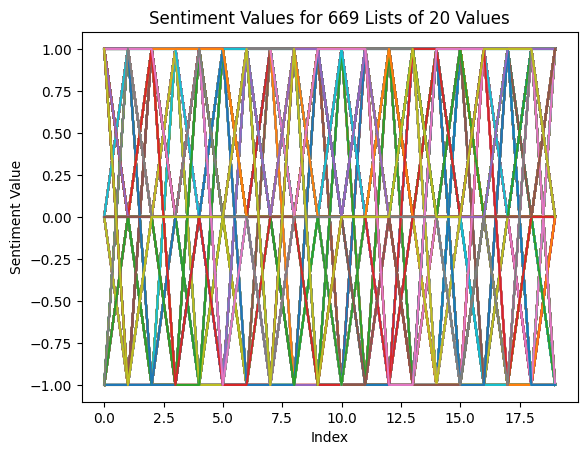

In [120]:
# type(last_20_u_sentiments)
# last_20_u_sentiments.plot.bar()
# plt.show()
# last_20_f_sentiments=last_20_f_sentiments.to_frame()
# fig, ax = plt.subplots()
# ax.hist(last_20_f_sentiments['Sentiments_f'], range=(-1, 1), label='Sentiment')
# ax.set_xlabel('Sentiment Value')
# ax.set_ylabel('Frequency')
# ax.set_title('Sentiment Distribution')
# ax.legend()
# plt.show()

# Plot the sentiment values for each list in the DataFrame
for i in range(len(last_20_f_sentiments['Sentiments_f'])):
    plt.plot(range(len(last_20_f_sentiments['Sentiments_f'][i])), last_20_f_sentiments['Sentiments_f'][i])

# Set the x-axis and y-axis labels
plt.xlabel('Index')
plt.ylabel('Sentiment Value')

# Set the title of the plot
plt.title('Sentiment Values for {} Lists of 20 Values'.format(len(last_20_f_sentiments['Sentiments_f'])))

# Show the plot
plt.show()

In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract first 20, middle 20, and last 20 sentiments for each user
first_20_u_sentiments = final_merged2['Sentiments_u'].apply(lambda x: x[:20])
middle_20_u_sentiments = final_merged2['Sentiments_u'].apply(lambda x: x[len(x)//2-10:len(x)//2+10])
last_20_u_sentiments = final_merged2['Sentiments_u'].apply(lambda x: x[-20:])

first_20_f_sentiments = final_merged2['Sentiments_f'].apply(lambda x: x[:20])
middle_20_f_sentiments = final_merged2['Sentiments_f'].apply(lambda x: x[len(x)//2-10:len(x)//2+10])
last_20_f_sentiments = final_merged2['Sentiments_f'].apply(lambda x: x[-20:])



In [148]:
ffcountneg=0
ffcountneu=0
ffcountpos=0
for i in first_20_f_sentiments:
    ffcountpos+=i.count(1)
    ffcountneg+=i.count(-1)
    ffcountneu+=i.count(0)
total=ffcountneg+ffcountneu+ffcountpos
print("f Positive First 20 Sentiment Percent :",ffcountpos/total*100)
print("f Negative First 20 Sentiment Percent :",ffcountneg/total*100)
print("f Neutral First 20 Sentiment Percent :",ffcountneu/total*100)


f Positive First 20 Percent : 43.86591669200365
f Negative First 20 Percent : 13.180297962906659
f Neutral First 20 Percent : 42.9537853450897


In [150]:
mfcountneg=0
mfcountneu=0
mfcountpos=0
for i in middle_20_f_sentiments:
    mfcountpos+=i.count(1)
    mfcountneg+=i.count(-1)
    mfcountneu+=i.count(0)
total=mfcountneg+mfcountneu+mfcountpos
print("f Positive Middle 20 Sentiment Percent :",mfcountpos/total*100)
print("f Negative Middle 20 Sentiment Percent :",mfcountneg/total*100)
print("f Neutral Middle 20 Sentiment Percent :",mfcountneu/total*100)

f Positive Middle 20 Percent : 44.508802682722354
f Negative Middle 20 Percent : 13.085892843533268
f Neutral Middle 20 Percent : 42.40530447374438


In [152]:
lfcountneg=0
lfcountneu=0
lfcountpos=0
for i in last_20_f_sentiments:
    lfcountpos+=i.count(1)
    lfcountneg+=i.count(-1)
    lfcountneu+=i.count(0)
total=lfcountneg+lfcountneu+lfcountpos
print("f Positive Last 20 Sentiment Percent :",lfcountpos/total*100)
print("f Negative Last 20 Sentiment Percent :",lfcountneg/total*100)
print("f Neutral Last 20 Sentiment Percent :",lfcountneu/total*100)

f Positive Last 20 Sentiment Percent : 42.12526603830952
f Negative Last 20 Sentiment Percent : 12.876254180602006
f Neutral Last 20 Sentiment Percent : 44.99847978108848


In [154]:
fucountneg=0
fucountneu=0
fucountpos=0
for i in first_20_u_sentiments:
    fucountpos+=i.count(1)
    fucountneg+=i.count(-1)
    fucountneu+=i.count(0)
total=fucountneg+fucountneu+fucountpos
print("u Positive First 20 Sentiment Percent :",fucountpos/total*100)
print("u Negative First 20 Sentiment Percent :",fucountneg/total*100)
print("u Neutral First 20 Sentiment Percent :",fucountneu/total*100)


f Positive First 20 Sentiment Percent : 38.889308081189164
f Negative First 20 Sentiment Percent : 15.641741492492267
f Neutral First 20 Sentiment Percent : 45.46895042631857


In [155]:
mucountneg=0
mucountneu=0
mucountpos=0
for i in middle_20_u_sentiments:
    mucountpos+=i.count(1)
    mucountneg+=i.count(-1)
    mucountneu+=i.count(0)
total=mucountneg+mucountneu+mucountpos
print("u Positive middle 20 Sentiment Percent :",mucountpos/total*100)
print("u Negative middle 20 Sentiment Percent :",mucountneg/total*100)
print("u Neutral middle 20 Sentiment Percent :",mucountneu/total*100)

f Positive middle 20 Sentiment Percent : 37.468681193531246
f Negative middle 20 Sentiment Percent : 11.836610735707236
f Neutral middle 20 Sentiment Percent : 50.69470807076152


In [157]:
lucountneg=0
lucountneu=0
lucountpos=0
for i in last_20_u_sentiments:
    lucountpos+=i.count(1)
    lucountneg+=i.count(-1)
    lucountneu+=i.count(0)
total=lucountneg+lucountneu+lucountpos
print("u Positive last 20 Sentiment Percent :",lucountpos/total*100)
print("u Negative last 20 Sentiment Percent :",lucountneg/total*100)
print("u Neutral last 20 Sentiment Percent :",lucountneu/total*100)

u Positive last 20 Sentiment Percent : 47.400588545989585
u Negative last 20 Sentiment Percent : 9.922281747528862
u Neutral last 20 Sentiment Percent : 42.67712970648155


In [68]:
final_merged2.to_csv("/media/EXTHDD/unfollow prediction/SidData/week8.csv")

In [43]:
df=pd.read_csv("/media/EXTHDD/unfollow prediction/SidData/week8.csv")